### _Keywords_

- Dimension of the data
- Linear Subspace


#### SOURCES
- https://blog.clairvoyantsoft.com/eigen-decomposition-and-pca-c50f4ca15501

# Main Ideas



1. First calculate the covariance matrix of the normalised data. Suppose $X$ represents the data matrix, where each row is a data point and each column is a feature. Then the covariance matrix is given by:
$$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$$

2. Calculate the eigenvalues and eigenvectors of the covariance matrix.The eigenvectors are called loadings and when the eigenvectors are multiplied by the normalised data matrix, the result is the principal components of the data.
$$\underbrace{P}_\text{Principal Compenents} = \underbrace{X}_\text{Normalised Matrix} \times \underbrace{L}_\text{Eigen Vectors / Loadings}$$

Now let us break these ideas:
- Eigenvectors of a matrix are the special vectors that do not change direction under the linear transformation. Eigenvectors are unit vectors with length or magnitude equal to 1. They are often referred to as right vectors, which simply means a column vector.
- Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude.

So, PCA is a method that:

Measures how each variable is associated with one another using a Covariance matrix. Understands the directions of the spread of our data using Eigenvectors. Brings out the relative importance of these directions using Eigenvalues

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

PCA gives the principal components. PCA projects the entire data into a different subspace or a feature space. 

In [2]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
iris.head()
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [4]:
iris.dropna(how="all", inplace=True) # drops the empty line at file-end
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

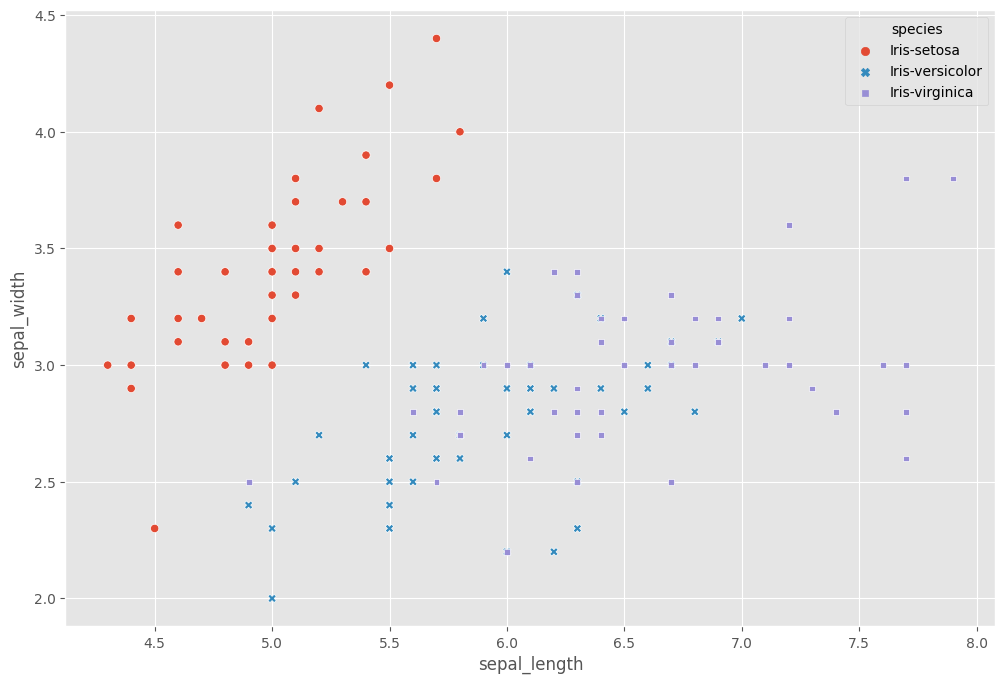

In [5]:
import seaborn as sns
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)

Before PCA, we need to standardize the data to 0 mean. This is because PCA is sensitive to the scale of the data. 

In [6]:
X = iris.iloc[:,0:4].values
y = iris.species.values

In [7]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

The first principal component is the direction of the maximum variance. The second principal component is the direction of the maximum variance in the orthogonal direction to the first principal component.

In [8]:
covariance_matrix = np.cov(X.T)

In [9]:
print(covariance_matrix)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


# Eigen Decomposition of the Covariance Matrix
We can use the eigen decomposition of the covariance matrix to find the principal components. The intuition behind this is that the eigenvectors represent the vectors that do not change direction during the transformation. This implies that these eigenvectors are the principal components.

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen Vectors: \n", eigen_vectors, "\n")
print("Eigen Values: \n", eigen_values, "\n")

Eigen Vectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigen Values: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



The columns represent the eigenvectors. The eigenvalues represent how much eigenvectors are stretched during the transformation. The eigenvectors with the highest eigenvalues are the principal components. 

# Singular Value Decomposition
Singular Value Decomposition means that any matrix can be written as the product of three matrices. The first matrix is the left singular vectors. The second matrix is the diagonal matrix of the singular values. The third matrix is the right singular vectors.

In [11]:
eigen_vector_SVD, s, v = np.linalg.svd(X.T)
eigen_vector_SVD

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [12]:
print(eigen_values)

[2.93035378 0.92740362 0.14834223 0.02074601]


In [13]:
variance_explained = [(i / sum(eigen_values))*100 for i in eigen_values]
print (f"The first component explains {variance_explained[0]}% of the variance.")
print (f"The second component explains {variance_explained[1]}% of the variance.")

The first component explains 72.77045209380132% of the variance.
The second component explains 23.03052326768064% of the variance.


Text(0.5, 1.0, 'Explained variance vs number of components')

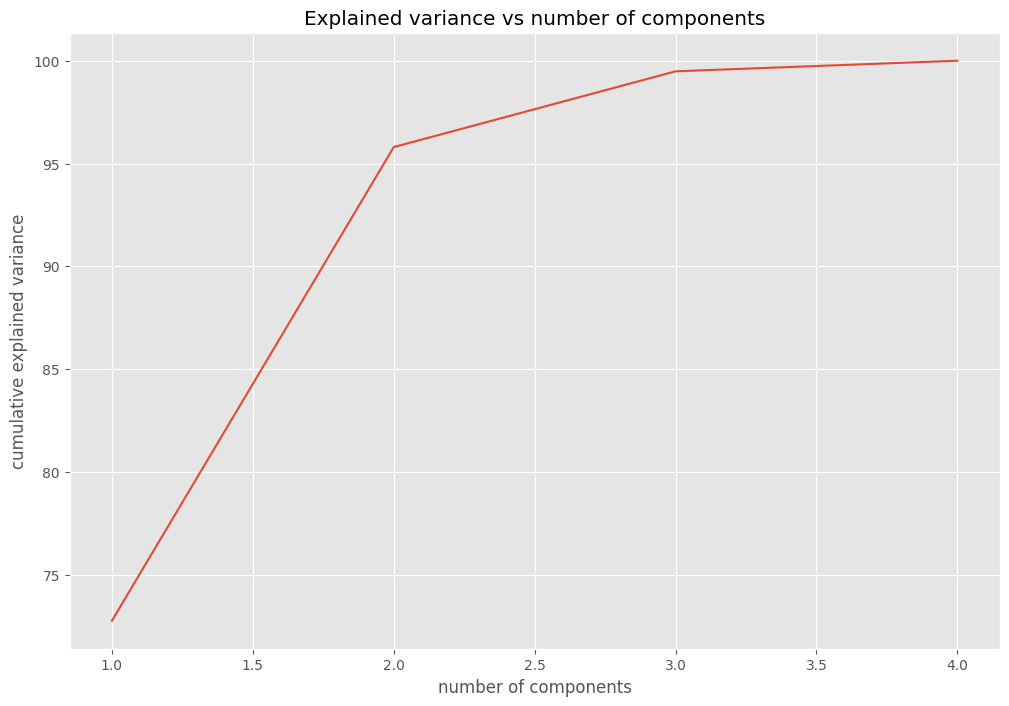

In [14]:
cumulative_variance_explained = np.cumsum(variance_explained)
scree_plot = sns.lineplot(x=[1,2,3,4], y=cumulative_variance_explained)
scree_plot.set(xlabel = 'number of components', ylabel='cumulative explained variance')
plt.title('Explained variance vs number of components')

In [15]:
projection_matrix = (eigen_vectors.T[:][:][:2]).T
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

## What is projection matrix?
The projection matrix projects the data onto the principal components. The projection matrix is the product of the eigenvectors and the diagonal matrix of the eigenvalues.

In [16]:
X_PCA = X.dot(projection_matrix)

Text(0.5, 1.0, 'Principal Component Analysis of Iris Dataset')

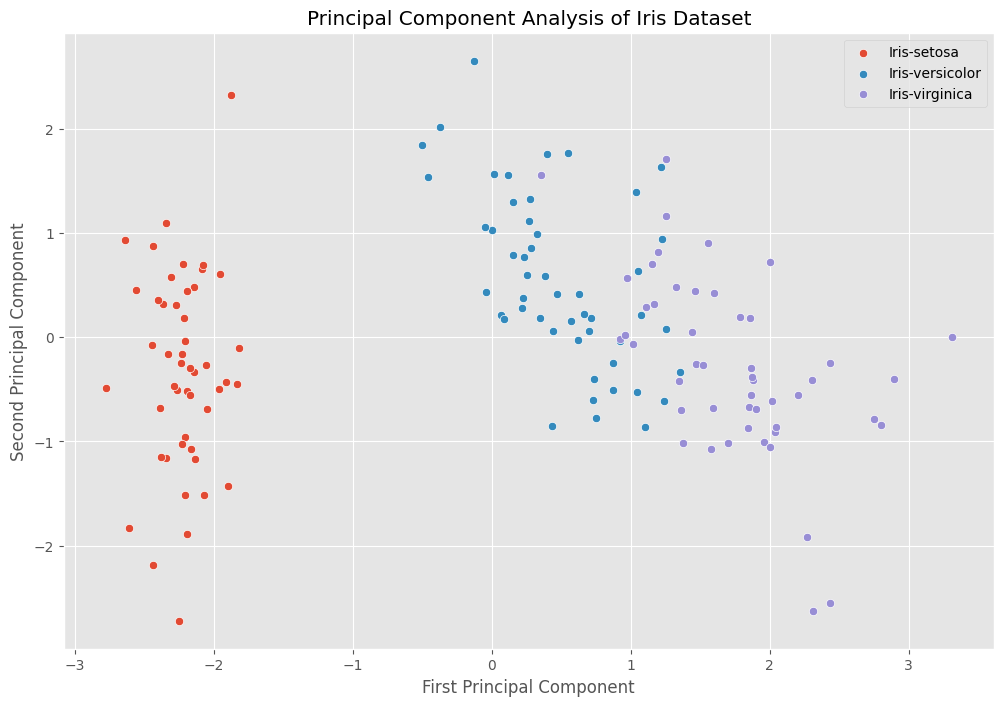

In [17]:
for species in iris.species.unique():
    sns.scatterplot(x=X_PCA[y==species, 0],
                    y=X_PCA[y==species, 1])

plt.legend(iris.species.unique())
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("Principal Component Analysis of Iris Dataset")


# Using Scikit-Learn to perform PCA

In [20]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
pca.fit(X)
principal_components = pca.components_
print(principal_components)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]
